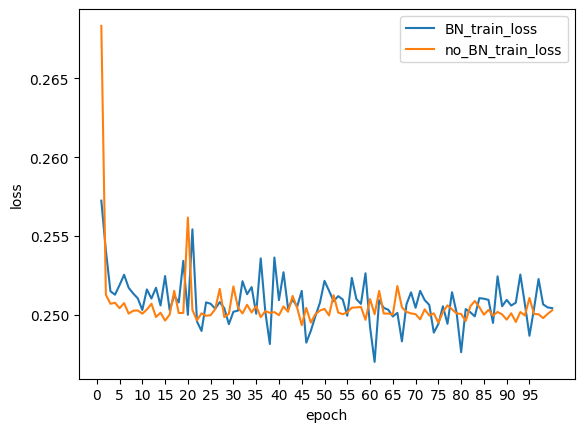

BNmodel acc: 0.24982869401574134 
noBNmodel acc: 0.24990044832229613


In [14]:
# 批量标准化
import torch
from torch import optim
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

def build_dataLoader():
    X, y = make_circles(
        n_samples=2000, 
        factor=0.5,
        noise=0.01, 
        random_state=42,
        shuffle=True
    )

    # print(X[0])     # 点的坐标
    # print(y[0])     # 点在内圈上（标签0）和点在外圈上（标签1）

    x = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    # plt.scatter(X[:, 0], X[:, 1], c=y)
    # plt.show()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    trainDataset = TensorDataset(x_train, y_train)
    testDataset = TensorDataset(x_test, y_test)
    return DataLoader(trainDataset, batch_size=100, shuffle=True), DataLoader(testDataset, batch_size=20, shuffle=True)

class NetWithBN(nn.Module):
    def __init__(self, input_size, output_size):
        super(NetWithBN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)

        x = self.fc3(x)
        return x

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()

        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
            x = self.fc1(x)
            x = self.relu1(x)

            x = self.fc2(x)
            x = self.relu2(x)

            x = self.fc3(x)
            return x

def train(model, train_loader):
    # 训练模式, 会进行dropout或批量标准化的参数更新
    model.train()

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    epochs = 100
    epoch_list = []
    train_loss = []
    for epoch in range(epochs):
        epoch_list.append(epoch+1)
        
        for data in train_loader:
            x, y = data
            y_pred = model(x)

            loss = criterion(y_pred, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
        train_loss.append(loss.item())
    return train_loss, epoch_list


def eval(model, test_loader):
    # 测试模式, 停止参数更新
    model.eval()

    criterion = nn.MSELoss()
    test_loss = []

    with torch.no_grad():
        for data in test_loader:
            x, y = data
            y_pred = model(x)
            loss = criterion(y_pred, y)
            test_loss.append(loss.item())
    
    return sum(test_loss) / len(test_loss)


trainLoader, testLoader = build_dataLoader()

BNmodel = NetWithBN(2, 1)
noBNmodel = Net(2, 1)

BN_train_loss, epoch_list = train(BNmodel, trainLoader)
no_BN_train_loss, epoch_list = train(noBNmodel, trainLoader)

BN_test_loss = eval(BNmodel, testLoader)
no_BN_test_loss = eval(noBNmodel, testLoader)

plt.plot(epoch_list, BN_train_loss, label="BN_train_loss")
plt.plot(epoch_list, no_BN_train_loss, label="no_BN_train_loss")

plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.xticks(range(0, 100, 5))
# plt.yticks(range(0, 5))
plt.show()

print('BNmodel acc:', BN_test_loss, '\nnoBNmodel acc:', no_BN_test_loss)

In [15]:
import torch
import torch.nn as nn


def dropout():
    dropout = nn.Dropout(p=0.5)
    x = torch.randint(0, 10, (5, 6), dtype=torch.float)
    print(x)
    # 开始dropout
    print(dropout(x))


if __name__ == "__main__":
    dropout()


tensor([[5., 3., 7., 3., 2., 9.],
        [5., 8., 6., 9., 0., 7.],
        [7., 4., 4., 1., 6., 7.],
        [3., 8., 8., 7., 5., 6.],
        [9., 1., 9., 8., 1., 1.]])
tensor([[ 0.,  0., 14.,  0.,  4.,  0.],
        [10., 16., 12.,  0.,  0., 14.],
        [ 0.,  0.,  0.,  2.,  0., 14.],
        [ 0.,  0., 16.,  0., 10.,  0.],
        [18.,  2., 18.,  0.,  0.,  0.]])
